In [1]:
import pandas as pd
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv("precio_diadm.csv")
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [3]:
# Función Regla de Sturges
def sturges_rule(data):
    n = len(data)
    k = 1 + 3.322 * np.log10(n)
    return int(np.round(k))

In [4]:
#---REGLA DE STURGES APLICADA---#
# Seleccionar la columna que deseas agrupar
datos = df['depth'].dropna()
# Calcular el número de intervalos con Sturges
k = sturges_rule(datos)
# Crear los límites de los intervalos
limites = np.linspace(datos.min(), datos.max(), k+1)
# Agrupar los datos
df['profundidad'] = pd.cut(df['depth'], bins=limites, include_lowest=True)
# Mostrar el resultado
resultado_agrupacion = df.groupby('profundidad', observed=True).size().reset_index(name='conteo')
estadisticas = df.groupby('profundidad', observed=True)['depth'].describe()
# Mostrar resultados
print("Distribución de frecuencias:")
print(resultado_agrupacion.to_string(index=False))
print("\nEstadísticas descriptivas:")
print(estadisticas.round(2).to_string())

Distribución de frecuencias:
     profundidad  conteo
(42.999, 45.118]       3
(49.353, 51.471]       2
(51.471, 53.588]       9
(53.588, 55.706]      33
(55.706, 57.824]     456
(57.824, 59.941]    4611
(59.941, 62.059]   26396
(62.059, 64.176]   20730
(64.176, 66.294]    1380
(66.294, 68.412]     251
(68.412, 70.529]      52
(70.529, 72.647]      12
(72.647, 74.765]       2
  (76.882, 79.0]       3

Estadísticas descriptivas:
                    count   mean   std   min    25%    50%    75%   max
profundidad                                                            
(42.999, 45.118]      3.0  43.33  0.58  43.0  43.00  43.00  43.50  44.0
(49.353, 51.471]      2.0  50.90  0.14  50.8  50.85  50.90  50.95  51.0
(51.471, 53.588]      9.0  52.93  0.44  52.2  52.70  53.10  53.20  53.4
(53.588, 55.706]     33.0  55.06  0.50  53.8  55.00  55.20  55.40  55.6
(55.706, 57.824]    456.0  57.16  0.55  55.8  56.80  57.30  57.60  57.8
(57.824, 59.941]   4611.0  59.21  0.56  57.9  58.80  59.30  59.7

In [5]:
calidad = df.cut.value_counts()
fig = px.bar(calidad, x=calidad.index, y=calidad.values)
fig.show()

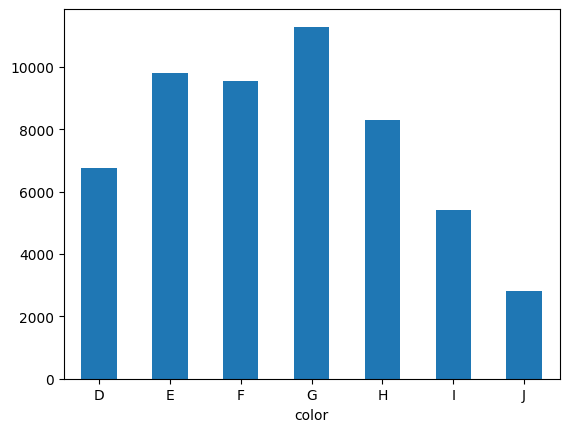

In [ ]:
orden_categorias = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
df.color = pd.Categorical(df.color, categories=orden_categorias, ordered=True)
color = df.color.value_counts().sort_index()
color.plot.bar()
plt.xticks(rotation=0)
plt.show()

claridad = df.clarity.value_counts()
claridad.plot.bar()
plt.xticks(rotation=0)
plt.show()

<Axes: ylabel='Density'>

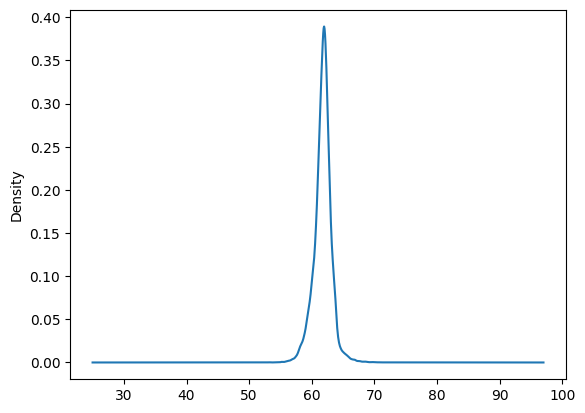

In [ ]:
df.depth.plot.density()

In [ ]:
fig = px.scatter(df, x="depth",y="table", trendline="ols")
for trace in fig.data:
    if trace.mode == "lines":
        trace.line.color = "red"  # Cambia "red" por el color que quieras, como "#00FF00"
fig.show()

In [ ]:
normal = MinMaxScaler()
df['depth_normalizado'] = normal.fit_transform(df[['depth']])

estandar = StandardScaler()
df['depth_estandarizado'] = estandar.fit_transform(df[['depth']])
print(df)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       depth_normalizado  depth_estanda

In [ ]:
fig = px.scatter(df, x="price",y="depth_normalizado", trendline="ols")
for trace in fig.data:
    if trace.mode == "lines":
        trace.line.color = "red"  # Cambia "red" por el color que quieras, como "#00FF00"
fig.show()

In [ ]:
fig = px.scatter(df, x="price",y="depth_estandarizado", trendline="ols")
for trace in fig.data:
    if trace.mode == "lines":
        trace.line.color = "red"  # Cambia "red" por el color que quieras, como "#00FF00"
fig.show()

In [ ]:
fig = px.box(df, y="depth")
fig.show()

In [43]:
Q1 = df['depth'].quantile(0.25)
Q3 = df['depth'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['depth'] >= Q1 - 1.5*IQR) & (df['depth'] <= Q3 + 1.5*IQR)]

fig = px.box(df, y="depth")
fig.show()